# Кластеризация



## 1. Подготовка наборов данных

### 1.1. Загрузите наборы


In [ ]:
import pandas as pd

scurve_df = pd.read_csv('sample_data/lab2_scurve.csv')
checker_df = pd.read_csv('sample_data/lab2_checker.csv')
luckyset_df = pd.read_csv('sample_data/lab2_luckyset.csv')

### 1.2. Проверьте корректность загрузки

In [ ]:
scurve_df.head()

,# x,y
0,0.7769,-0.0745
1,1.0976,1.0850
2,-0.1853,1.7859
3,-0.9032,0.3314
4,0.3942,-2.1040


In [ ]:
checker_df.head()

,# x,y
0,4.0510,0.9697
1,7.5581,5.1224
2,2.8765,7.0870
3,3.8366,0.8614
4,4.2159,0.7742


In [ ]:
luckyset_df.head()

,# x,y
0,-0.4743,0.3005
1,-0.6205,6.2994
2,2.5470,0.5894
3,-0.0678,4.9441
4,-0.0254,0.3081


### 1.3. Постройте диаграмму рассеяния набора данных. Опишите форму данных.


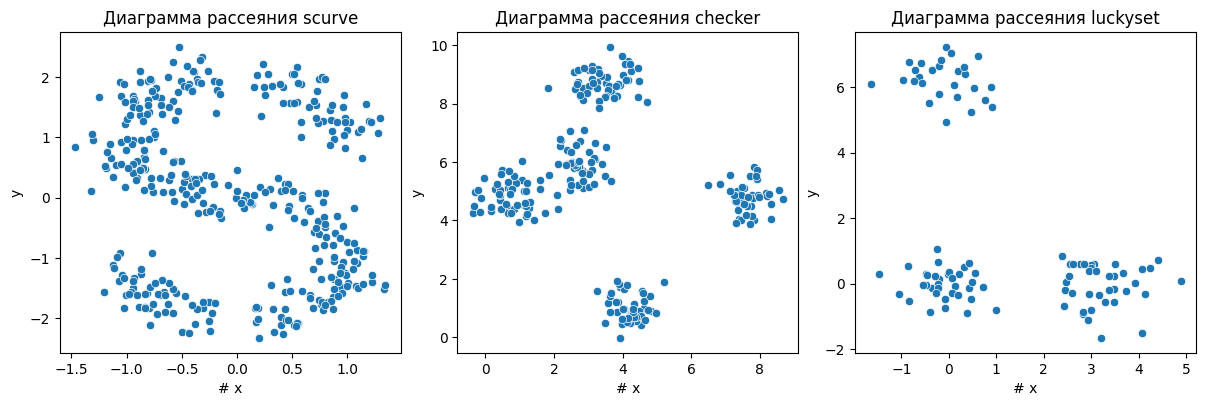

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
df_s = [scurve_df, checker_df, luckyset_df]
titles = ['scurve', 'checker', 'luckyset']
for i, df in enumerate(df_s):
    x, y = df.columns[0], df.columns[1]
    sns.scatterplot(x=df[x], y=df[y], ax=axes[i]).set_title(
        'Диаграмма рассеяния ' + titles[i])
plt.tight_layout(pad=0.5)
plt.show()

### 1.4. Подготовьте наборы данных проведя стандартизация или нормировку данных. Обоснуйте выбор операции.


In [ ]:
from scipy.stats import shapiro

def shapiro_test(data):
    for column in data.columns:
        print('\tcolumn:', column)
        print(f"\t\tpvalue: {shapiro(data[column]).pvalue}")
print('scurve:')
shapiro_test(scurve_df)
print('checker:')
shapiro_test(checker_df)
print('luckyset:')
shapiro_test(luckyset_df)

scurve:
	column: # x
		pvalue: 1.6214001712436255e-12
	column: y
		pvalue: 2.0171576214922382e-11
checker:
	column: # x
		pvalue: 1.3900943729439064e-09
	column: y
		pvalue: 2.064556303693621e-09
luckyset:
	column: # x
		pvalue: 3.866394990836852e-07
	column: y
		pvalue: 3.5504099660244037e-12


In [ ]:
scurve_df.describe()

,# x,y
count,368.000000,368.000000
mean,-0.040508,0.022287
std,0.754779,1.356283
min,-1.465100,-2.330200
25%,-0.761400,-1.359450
50%,-0.196300,0.104100
75%,0.707850,1.279725
max,1.343800,2.500500


In [ ]:
checker_df.describe()

,# x,y
count,250.000000,250.000000
mean,3.646908,5.183671
std,2.286382,2.522758
min,-0.367000,-0.024100
25%,2.408200,4.282800
50%,3.322550,5.123200
75%,4.439800,6.553200
max,8.682800,9.940200


In [ ]:
luckyset_df.describe()

,# x,y
count,100.000000,100.000000
mean,1.165321,1.658658
std,1.724204,2.843817
min,-1.650700,-1.662500
25%,-0.230475,-0.198625
50%,0.431050,0.304450
75%,2.931975,5.286075
max,4.885700,7.233300


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scurve_np = MinMaxScaler().fit_transform(scurve_df)
checker_np = MinMaxScaler().fit_transform(checker_df)
luckyset_np = MinMaxScaler().fit_transform(luckyset_df)

## 2. K-Means

### 2.1. Проведите исследование оптимального количества кластеров методов локтя. Сделайте выводы, о наиболее подходящем количестве кластеров.


In [ ]:
from sklearn.cluster import KMeans
import numpy as np


def elbow_method(data, max_n_clusters):
    inertia_list = []
    for i in range(1, max_n_clusters):
        k_means = KMeans(n_clusters=i, n_init=10)
        k_means.fit(data)
        inertia_list.append(k_means.inertia_)
    return inertia_list

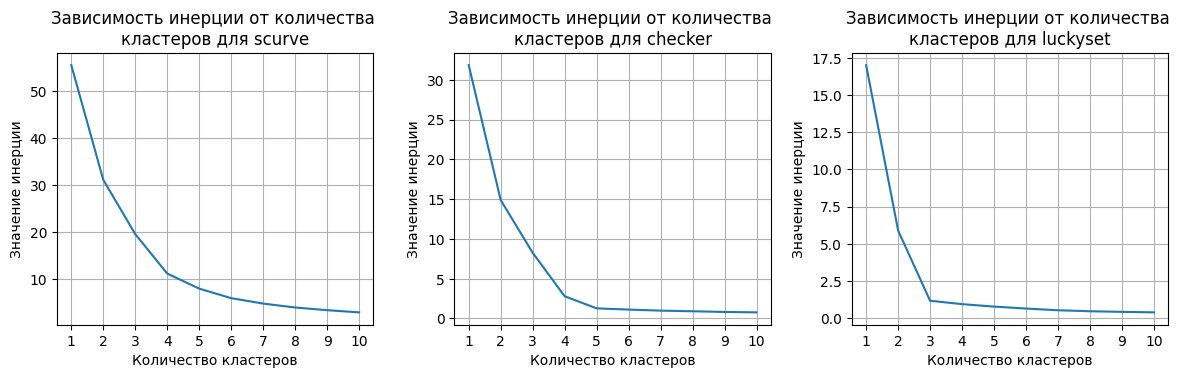

In [ ]:
data_nps = [scurve_np, checker_np, luckyset_np]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, data_np in enumerate(data_nps):
    inertia_list = elbow_method(data_np, 11)
    sns.lineplot(x=list(np.arange(1, 11)), y=inertia_list,
                 ax=axes[i]).set_title(
                     'Зависимость инерции от количества \nкластеров для ' +
                     titles[i])
    axes[i].set_ylabel('Значение инерции')
    axes[i].set_xlabel('Количество кластеров')
    axes[i].set_xticks(list(np.arange(1, 11)))
    axes[i].grid()
plt.tight_layout(pad=1.5)
plt.show()

### 2.2. Проведите исследование оптимального количества кластеров методом силуэта. Сделайте выводы, о наиболее подходящем количестве кластеров.


In [ ]:
from sklearn.metrics import silhouette_score


def silhouette_method(data, max_n_clusters):
    silhouette_list = []
    for i in range(2, max_n_clusters):
        k_means = KMeans(n_clusters=i, n_init=10)
        labels = k_means.fit_predict(data)
        silhouette_list.append(silhouette_score(data, labels))
    return silhouette_list

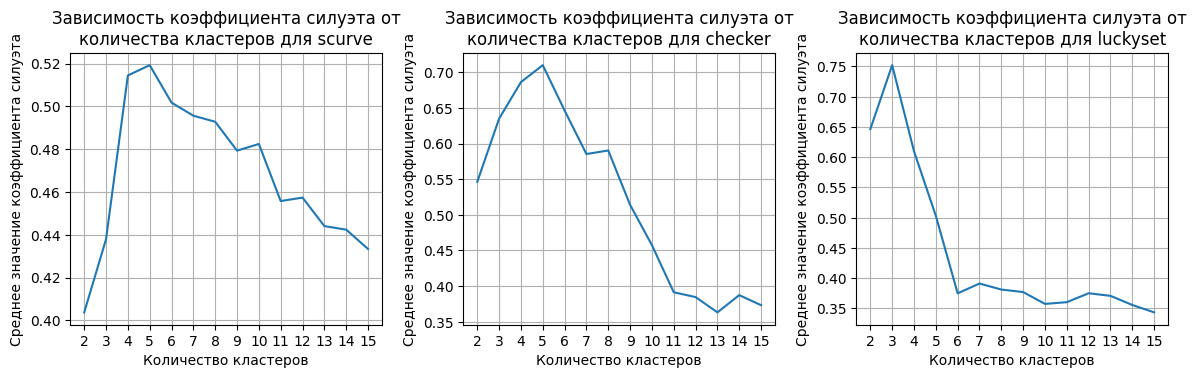

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, data_np in enumerate(data_nps):
    silhouette_list = silhouette_method(data_np, 16)
    sns.lineplot(x=list(np.arange(2, 16)), y=silhouette_list,
                 ax=axes[i]).set_title(
                     'Зависимость коэффициента силуэта от\nколичества кластеров для '
                     + titles[i])
    axes[i].set_ylabel('Среднее значение коэффициента силуэта')
    axes[i].set_xlabel('Количество кластеров')
    axes[i].set_xticks(list(np.arange(2, 16)))
    axes[i].grid()
plt.tight_layout(pad=1.5)
plt.show()

### 2.3. Проведите кластеризацию алгоритмом K-means, с выбранным оптимальным количеством кластеров.


Количество кластеров выбрано в соответствии с силуэтным методом

In [ ]:
kmeans_scurve = KMeans(n_clusters=5, n_init=10)
kmeans_labels_scurve = kmeans_scurve.fit_predict(scurve_np)
kmeans_checker = KMeans(n_clusters=5, n_init=10)
kmeans_labels_checker = kmeans_checker.fit_predict(checker_np)
kmeans_luckyset = KMeans(n_clusters=3, n_init=10)
kmeans_labels_luckyset = kmeans_luckyset.fit_predict(luckyset_np)

### 2.4. Постройте диаграмму рассеяния результатов кластеризации с выделением разным цветом разных кластеров.


In [ ]:
def get_data_dict(data, labels):
    d = {'# x': data[:, 0],
        'y': data[:, 1],
        'target': labels}
    return d

scurve_clustered_df = pd.DataFrame(data=get_data_dict(scurve_np,
                                                      kmeans_labels_scurve))
checker_clustered_df = pd.DataFrame(data=get_data_dict(checker_np,
                                                       kmeans_labels_checker))
luckyset_clustered_df = pd.DataFrame(data=get_data_dict(luckyset_np,
                                                        kmeans_labels_luckyset))

In [ ]:
def plot_scatter(data_clustered, titles):
    n = len(data_clustered)
    fig, axes = plt.subplots(nrows=1, ncols=len(data_clustered),
                             figsize=(n*5 , 5))
    for i in range(len(data_clustered)):
        sns.scatterplot(data=data_clustered[i], x='# x', y='y',
                    hue='target', palette='tab10', ax=axes[i]).set_title(
                        titles[i])
    plt.show()

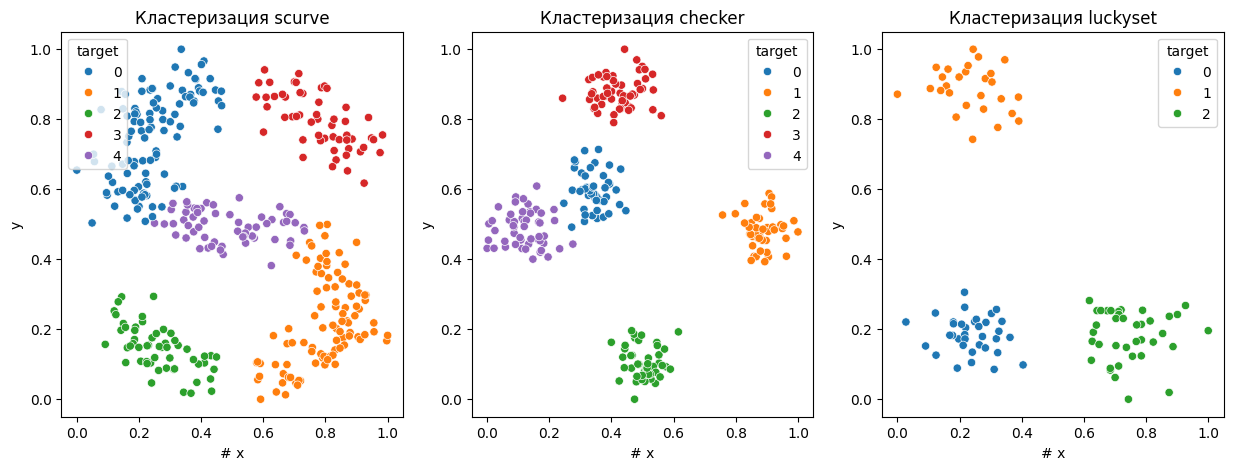

In [ ]:
data_clustered = [scurve_clustered_df, checker_clustered_df,
                  luckyset_clustered_df]
plot_scatter(data_clustered, ['Кластеризация ' + title for title in titles])

### 2.5. Постройте диаграмму Вороного для результатов кластеризации. На диаграмме отметьте центроиды полученных кластеров.


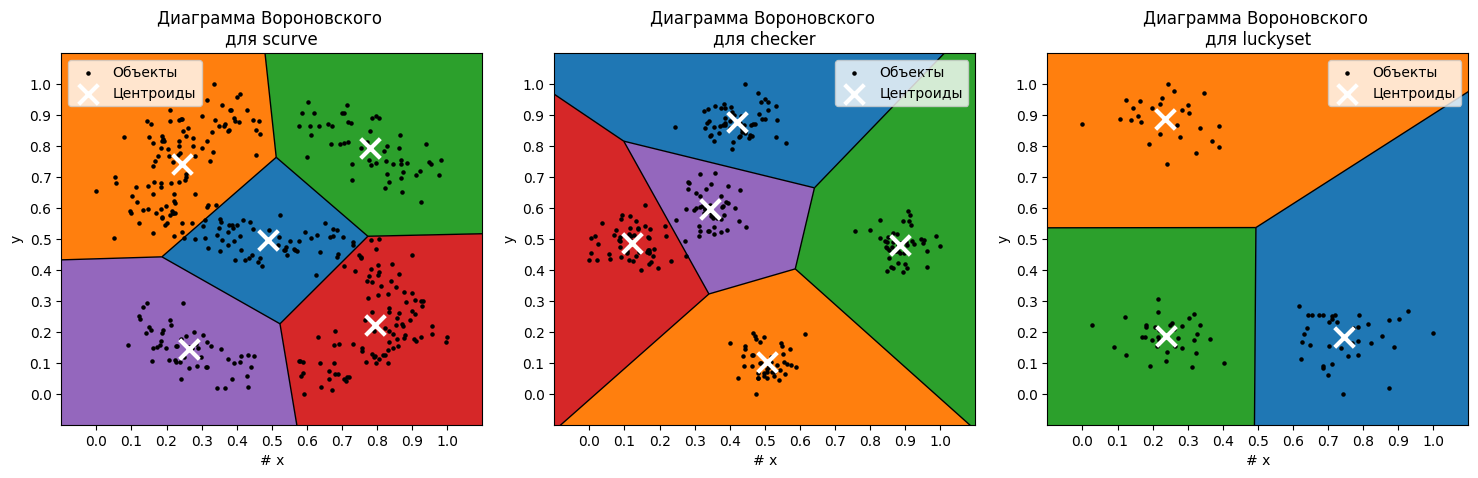

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d


centroids_list = [kmeans_scurve.cluster_centers_,
                  kmeans_checker.cluster_centers_,
                    kmeans_luckyset.cluster_centers_]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
legends = ['upper left', 'upper right', 'upper right']
for i, centroids in enumerate(centroids_list):
    points = centroids
    max_x, max_y = data_nps[i][:, 0].max(), data_nps[i][:, 1].max()
    min_x, min_y = data_nps[i][:, 0].min(), data_nps[i][:, 1].min()
    points = np.vstack((points, np.array([max_x+10, max_y+10])))
    points = np.vstack((points, np.array([max_x+10, min_y-10])))
    points = np.vstack((points, np.array([min_x-10, max_y+10])))
    points = np.vstack((points, np.array([min_x-10, min_y-10])))

    vor = Voronoi(points)
    voronoi_plot_2d(vor, show_vertices=False, point_size=0, ax=axes[i])
    for region in vor.regions:
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            axes[i].fill(*zip(*polygon))
    axes[i].scatter(data_nps[i][:, 0], data_nps[i][:, 1],
                s=5, c='black', label='Объекты')
    axes[i].scatter(points[:, 0], points[:, 1], s=200, marker='x',
                c='white', linewidth=3, label='Центроиды')
    axes[i].set_xticks(list(np.arange(0, 1.1, 0.1)))
    axes[i].set_yticks(list(np.arange(0, 1.1, 0.1)))
    axes[i].set_xlim([min_x-0.1, max_x+0.1])
    axes[i].set_ylim([min_y-0.1, max_y+0.1])
    axes[i].set_title('Диаграмма Вороновского \nдля ' + titles[i])
    axes[i].set_xlabel('# x')
    axes[i].set_ylabel('y')
    axes[i].legend(loc=legends[i])

plt.tight_layout(pad=1.5)
plt.show()

### 2.6. Постройте для каждого признака диаграмму “box-plot” или “violin-plot”, с разделением по кластерам. Сделайте выводы о разделении кластеров и успешности применения кластеризации K-means к набору данных.


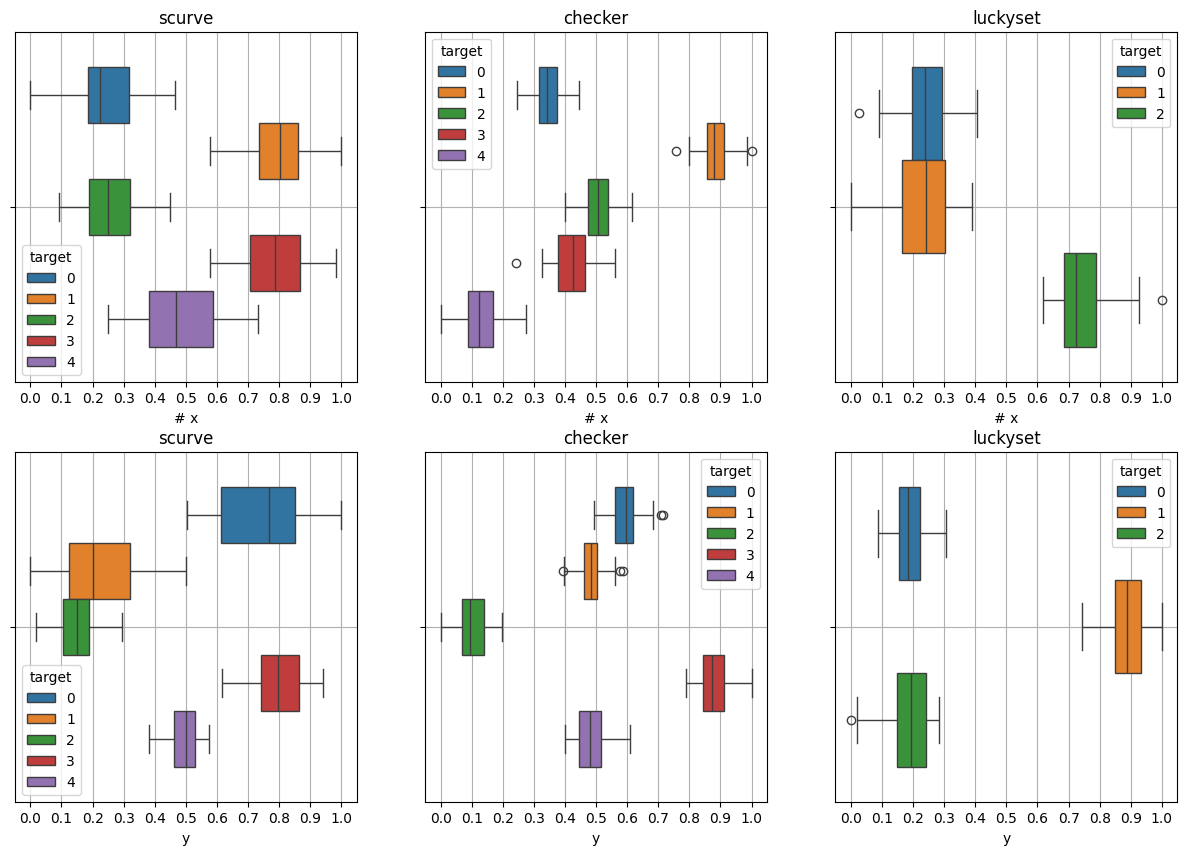

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
features = scurve_df.columns
for i in range(len(features)):
    for j in range(len(data_clustered)):
        sns.boxplot(data=data_clustered[j], x=features[i], hue='target',
                    palette='tab10', ax=axes[i][j]).set_title(
                        titles[j])
        axes[i][j].grid()
        axes[i][j].set_xticks(list(np.arange(0, 1.1, 0.1)))

### 2.7. Рассчитайте для каждого кластера кол-во точек, среднее, СКО, минимум и максимум. Сопоставьте результаты с построенными графиками.


In [ ]:
def compute_cluster_data(X):
    outer_features, inner_features = ['# x', 'y'], ['25%', '50%', '75%']
    columns_to_drop = []
    for outer_feature in outer_features:
        for inner_feature in inner_features:
            columns_to_drop.append((outer_feature, inner_feature))
    return X.groupby('target').describe().drop(columns_to_drop, axis=1)

In [ ]:
compute_cluster_data(scurve_clustered_df)

# x                                              y            \
        count      mean       std       min       max  count      mean   
target                                                                   
0       105.0  0.244124  0.101024  0.000000  0.465948  105.0  0.742655   
1        95.0  0.794597  0.098340  0.578910  1.000000   95.0  0.223218   
2        55.0  0.264489  0.095704  0.091424  0.449393   55.0  0.145307   
3        54.0  0.780372  0.109621  0.577094  0.983695   54.0  0.793644   
4        59.0  0.488679  0.130895  0.249991  0.732066   59.0  0.494542   

                                      
             std       min       max  
target                                
0       0.130319  0.503633  1.000000  
1       0.127172  0.000000  0.499472  
2       0.065403  0.017182  0.293808  
3       0.078654  0.617405  0.941044  
4       0.043383  0.381767  0.575486

In [ ]:
compute_cluster_data(checker_clustered_df)

# x                                             y            \
       count      mean       std       min       max count      mean   
target                                                                 
0       50.0  0.343477  0.042936  0.246900  0.446452  50.0  0.594685   
1       46.0  0.886668  0.046826  0.757464  1.000000  46.0  0.481167   
2       46.0  0.504848  0.045788  0.399567  0.615417  46.0  0.103930   
3       55.0  0.421779  0.064685  0.242856  0.560222  55.0  0.877348   
4       53.0  0.122688  0.061366  0.000000  0.275951  53.0  0.485998   

                                      
             std       min       max  
target                                
0       0.053326  0.491675  0.713658  
1       0.047662  0.392983  0.588039  
2       0.046222  0.000000  0.195799  
3       0.043846  0.790301  1.000000  
4       0.049018  0.400259  0.608984

In [ ]:
compute_cluster_data(luckyset_clustered_df)

# x                                             y            \
       count      mean       std       min       max count      mean   
target                                                                 
0       35.0  0.237620  0.079065  0.027355  0.404305  35.0  0.185355   
1       27.0  0.236701  0.094429  0.000000  0.390490  27.0  0.886214   
2       38.0  0.746698  0.094273  0.617679  1.000000  38.0  0.182074   

                                      
             std       min       max  
target                                
0       0.051775  0.085344  0.305672  
1       0.064409  0.742665  1.000000  
2       0.071532  0.000000  0.281897

## 3. DBSCAN

### 3.1. Подберите параметры алгоритма DBSCAN, которые на ваш взгляд дают наилучшие результаты. Опишите процесс (почему и как изменяли параметры) подбора параметров.


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, \
    calinski_harabasz_score

def compute_zmod(X):
    MAD = np.median(np.abs(X - np.median(X, axis=0)), axis=0)
    zmod = (0.6745 * (X - np.median(X, axis=0))) / (MAD + 1e-5)
    return zmod

In [ ]:
%pip install -q tqdm

In [ ]:
def assign_score(data, labels, scores_dict, metric, estimator):
    mask = (labels != -1)
    match metric:
        case 'ss':
            try:
                score = silhouette_score(data[mask], labels[mask])
            except ValueError:
                score = -1
            else:
                scores_dict[score] = estimator
        case 'dbs':
            try:
                score = davies_bouldin_score(data[mask], labels[mask])
            except ValueError:
                score = -1
            else:
                scores_dict[score] = estimator
        case 'chs':
            try:
                score = calinski_harabasz_score(data[mask], labels[mask])
            except ValueError:
                score = -1
            else:
                scores_dict[score] = estimator
    return scores_dict

In [ ]:
def get_sorted_scores_dict(scores_dict, metric):
    match metric:
        case 'ss':
            scores_dict = {key: value for key, value in sorted(
                scores_dict.items(), reverse=True)}
        case 'dbs':
            scores_dict = {key: value for key, value in sorted(
                scores_dict.items())}
        case 'chs':
            scores_dict = {key: value for key, value in sorted(
                scores_dict.items(), reverse=True)}
    return scores_dict

In [ ]:
from sklearn.cluster import DBSCAN
from tqdm.auto import tqdm


def get_dbscan_scores_dict(data, eps_s, mins_samples, metric):
    max_score = -1
    scores_dict = {}
    for eps in tqdm(eps_s):
        for min_samples in mins_samples:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            zmod = compute_zmod(data)
            zmod_mask = (np.abs(zmod) < 3.5).all(axis=1)
            n_outliers = len(data) - len(data[zmod_mask])
            labels = dbscan.fit_predict(data)
            if len(labels[labels == -1]) <= n_outliers:
                scores_dict = assign_score(data, labels,
                                           scores_dict, metric, dbscan)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
def print_scores_estimators(data, scores_dict, name, extra_info='', n_keys=None):
    if n_keys is None:
        n_keys = len(scores_dict)
    else:
        n_keys = min(n_keys, len(scores_dict))
    sliced_keys = list(scores_dict)[:n_keys]
    if extra_info != '':
        extra_info = f"{extra_info}, n_clusters = "
    print(f"{name}:")
    for key in sliced_keys:
        print(f"\tscore = {key}:\n\t\t{extra_info}{scores_dict[key]}")
        estimator = scores_dict[key]
        if extra_info == '':
            labels = estimator.fit_predict(data)
            max_label = max(labels)
            min_label = min(labels)
        else:
            Z = linkage(wineset_preproc, extra_info.split(',')[0])
            labels = fcluster(Z, estimator, 'maxclust')
            max_label = estimator
            min_label = 1
        if min_label in [-1, 0]:
            n = max_label + 1
        else:
            n = max_label
        print(f"\t\t\tnumber of clusters = {n}")
        for i in range(min_label, max_label+1):
            power = len(labels[labels == i])
            print(f"\t\t\tpower of cluster {i} = {power}")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

n_keys=[3, 1, 1]
for i, title in enumerate(titles):
    scores_dict = get_dbscan_scores_dict(data_nps[i],
                                         np.arange(0.01, 0.15, 0.01),
                                        np.arange(2, len(data_nps[i])), 'ss')
    print_scores_estimators(data_nps[i], scores_dict, titles[i], n_keys=n_keys[i])

  0%|          | 0/14 [00:00<?, ?it/s]

scurve:
	score = 0.27143355102852385:
		DBSCAN(eps=0.13, min_samples=15)
			number of clusters = 2
			power of cluster 0 = 313
			power of cluster 1 = 55
	score = 0.2660597367718648:
		DBSCAN(eps=0.14, min_samples=18)
			number of clusters = 2
			power of cluster 0 = 315
			power of cluster 1 = 53
	score = 0.23472838993201214:
		DBSCAN(eps=0.14, min_samples=28)
			number of clusters = 3
			power of cluster 0 = 259
			power of cluster 1 = 55
			power of cluster 2 = 54


  0%|          | 0/14 [00:00<?, ?it/s]

checker:
	score = 0.7095475215193976:
		DBSCAN(eps=0.09, min_samples=22)
			number of clusters = 5
			power of cluster -1 = 1
			power of cluster 0 = 46
			power of cluster 1 = 46
			power of cluster 2 = 53
			power of cluster 3 = 50
			power of cluster 4 = 54


  0%|          | 0/14 [00:00<?, ?it/s]

luckyset:
	score = 0.7925841748145548:
		DBSCAN(eps=0.08, min_samples=10)
			number of clusters = 3
			power of cluster -1 = 23
			power of cluster 0 = 32
			power of cluster 1 = 30
			power of cluster 2 = 15


In [ ]:
import warnings
warnings.filterwarnings('ignore')

n_keys=[3, 1, 1]
for i, title in enumerate(titles):
    scores_dict = get_dbscan_scores_dict(data_nps[i],
                                         np.arange(0.01, 0.15, 0.01),
                                        np.arange(2, len(data_nps[i])), 'dbs')
    print_scores_estimators(data_nps[i], scores_dict, titles[i], n_keys=n_keys[i])

  0%|          | 0/14 [00:00<?, ?it/s]

scurve:
	score = 0.9106826540392716:
		DBSCAN(eps=0.14, min_samples=18)
			number of clusters = 2
			power of cluster 0 = 315
			power of cluster 1 = 53
	score = 0.9167746866262408:
		DBSCAN(eps=0.13, min_samples=15)
			number of clusters = 2
			power of cluster 0 = 313
			power of cluster 1 = 55
	score = 1.0866426193817549:
		DBSCAN(eps=0.14, min_samples=20)
			number of clusters = 3
			power of cluster 0 = 263
			power of cluster 1 = 52
			power of cluster 2 = 53


  0%|          | 0/14 [00:00<?, ?it/s]

checker:
	score = 0.38778714679218085:
		DBSCAN(eps=0.09, min_samples=22)
			number of clusters = 5
			power of cluster -1 = 1
			power of cluster 0 = 46
			power of cluster 1 = 46
			power of cluster 2 = 53
			power of cluster 3 = 50
			power of cluster 4 = 54


  0%|          | 0/14 [00:00<?, ?it/s]

luckyset:
	score = 0.2772848104193372:
		DBSCAN(eps=0.08, min_samples=10)
			number of clusters = 3
			power of cluster -1 = 23
			power of cluster 0 = 32
			power of cluster 1 = 30
			power of cluster 2 = 15


In [ ]:
import warnings
warnings.filterwarnings('ignore')

n_keys=[3, 1, 1]
for i, title in enumerate(titles):
    scores_dict = get_dbscan_scores_dict(data_nps[i],
                                         np.arange(0.01, 0.15, 0.01),
                                        np.arange(2, len(data_nps[i])), 'chs')
    print_scores_estimators(data_nps[i], scores_dict, titles[i], n_keys=n_keys[i])

  0%|          | 0/14 [00:00<?, ?it/s]

scurve:
	score = 94.3215849891565:
		DBSCAN(eps=0.13, min_samples=15)
			number of clusters = 2
			power of cluster 0 = 313
			power of cluster 1 = 55
	score = 93.6356740518537:
		DBSCAN(eps=0.14, min_samples=28)
			number of clusters = 3
			power of cluster 0 = 259
			power of cluster 1 = 55
			power of cluster 2 = 54
	score = 92.93422065768722:
		DBSCAN(eps=0.12, min_samples=20)
			number of clusters = 3
			power of cluster 0 = 260
			power of cluster 1 = 53
			power of cluster 2 = 55


  0%|          | 0/14 [00:00<?, ?it/s]

checker:
	score = 1481.941110324499:
		DBSCAN(eps=0.11, min_samples=38)
			number of clusters = 5
			power of cluster -1 = 1
			power of cluster 0 = 46
			power of cluster 1 = 46
			power of cluster 2 = 55
			power of cluster 3 = 48
			power of cluster 4 = 54


  0%|          | 0/14 [00:00<?, ?it/s]

luckyset:
	score = 827.8403912358822:
		DBSCAN(eps=0.06999999999999999, min_samples=7)
			number of clusters = 3
			power of cluster -1 = 20
			power of cluster 0 = 31
			power of cluster 1 = 17
			power of cluster 2 = 32


In [ ]:
import warnings
warnings.filterwarnings('ignore')

n_keys=[3, 1, 1]
for i, title in enumerate(titles):
    scores_dict = get_dbscan_scores_dict(data_nps[i],
                                         np.arange(0.01, 0.15, 0.01),
                                        np.arange(2, len(data_nps[i])), 'chs')
    print_scores_estimators(data_nps[i], scores_dict, titles[i], n_keys=n_keys[i])

  0%|          | 0/14 [00:00<?, ?it/s]

scurve:
	score = 94.3215849891565:
		DBSCAN(eps=0.13, min_samples=15)
			number of clusters = 2
			power of cluster 0 = 313
			power of cluster 1 = 55
	score = 93.6356740518537:
		DBSCAN(eps=0.14, min_samples=28)
			number of clusters = 3
			power of cluster 0 = 259
			power of cluster 1 = 55
			power of cluster 2 = 54
	score = 92.93422065768722:
		DBSCAN(eps=0.12, min_samples=20)
			number of clusters = 3
			power of cluster 0 = 260
			power of cluster 1 = 53
			power of cluster 2 = 55


  0%|          | 0/14 [00:00<?, ?it/s]

checker:
	score = 1481.941110324499:
		DBSCAN(eps=0.11, min_samples=38)
			number of clusters = 5
			power of cluster -1 = 1
			power of cluster 0 = 46
			power of cluster 1 = 46
			power of cluster 2 = 55
			power of cluster 3 = 48
			power of cluster 4 = 54


  0%|          | 0/14 [00:00<?, ?it/s]

luckyset:
	score = 827.8403912358822:
		DBSCAN(eps=0.06999999999999999, min_samples=7)
			number of clusters = 3
			power of cluster -1 = 20
			power of cluster 0 = 31
			power of cluster 1 = 17
			power of cluster 2 = 32


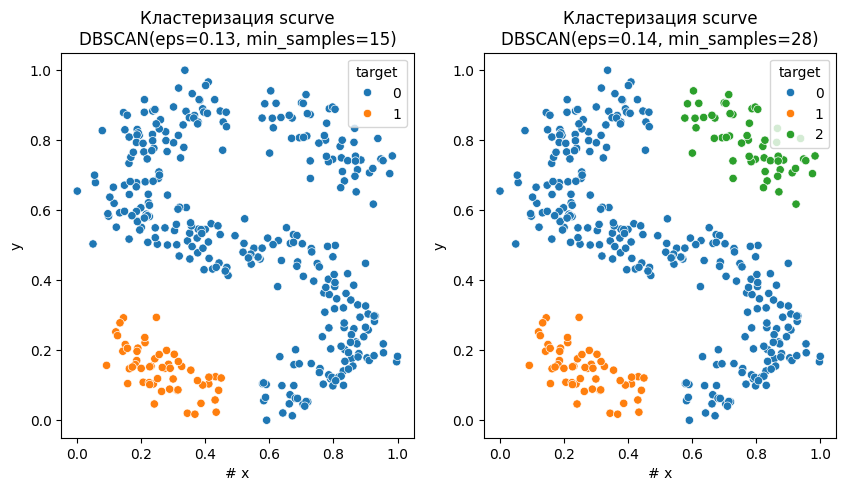

In [ ]:
dbscan_1 = DBSCAN(eps=0.13, min_samples=15)
dbscan_labels_scurve_1 = dbscan_1.fit_predict(scurve_np)
dbscan_2 = DBSCAN(eps=0.14, min_samples=28)
dbscan_labels_scurve_2 = dbscan_2.fit_predict(scurve_np)
scurve_clustered_df1 = pd.DataFrame(data=get_data_dict(scurve_np,
                                                      dbscan_labels_scurve_1))
scurve_clustered_df2 = pd.DataFrame(data=get_data_dict(scurve_np,
                                                       dbscan_labels_scurve_2))
data_clustered = [scurve_clustered_df1, scurve_clustered_df2]
dbscans = [dbscan_1, dbscan_2]
plot_scatter(data_clustered, ['Кластеризация scurve\n' + str(dbscan)
                             for dbscan in dbscans])

### 3.2. Постройте диаграмму рассеяния результатов кластеризации с выделением разным цветом разных кластеров.

In [ ]:
dbscan = DBSCAN(eps=0.14, min_samples=28)
dbscan_labels_scurve = dbscan.fit_predict(scurve_np)
dbscan = DBSCAN(eps=0.09, min_samples=22)
dbscan_labels_checker = dbscan.fit_predict(checker_np)
dbscan = DBSCAN(eps=0.08, min_samples=10)
dbscan_labels_luckyset = dbscan.fit_predict(luckyset_np)

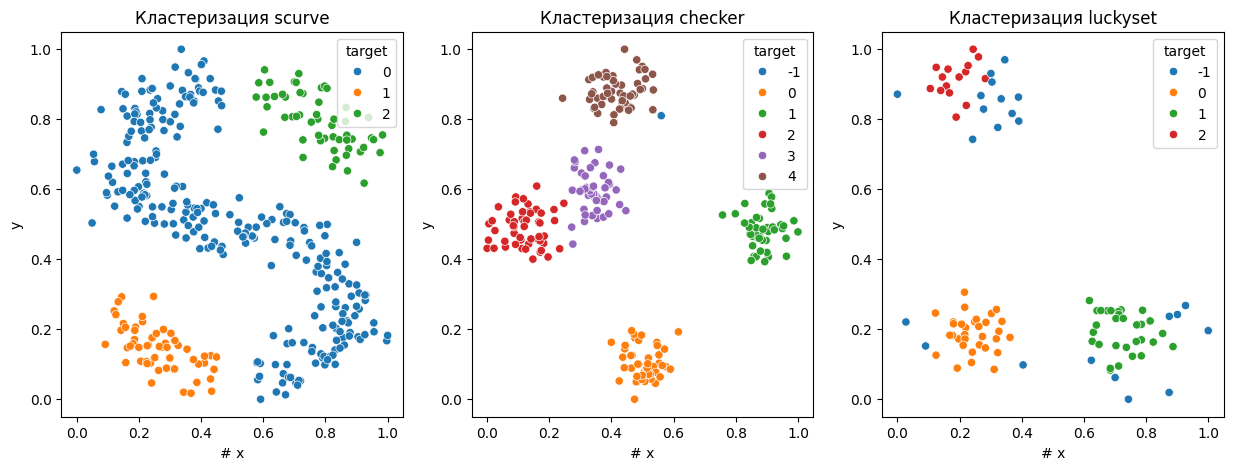

In [ ]:
scurve_clustered_df = pd.DataFrame(data=get_data_dict(scurve_np,
                                                      dbscan_labels_scurve))
checker_clustered_df = pd.DataFrame(data=get_data_dict(checker_np,
                                                       dbscan_labels_checker))
luckyset_clustered_df = pd.DataFrame(data=get_data_dict(luckyset_np,
                                                        dbscan_labels_luckyset))
data_clustered = [scurve_clustered_df, checker_clustered_df,
                  luckyset_clustered_df]
plot_scatter(data_clustered, ['Кластеризация ' + title for title in titles])

### 3.3. Сделайте выводы об успешности кластеризации.

Можно найти выбросы с помощью DBSCAN

## 4. Иерархическая кластеризация

### 4.1. Проведите иерархическую кластеризацию при всех возможных параметрах linkage, используя количество кластеров полученных в п.2 или п.3. Для каждого из результатов постройте дендрограмму. Сделайте выводы, о разделении кластеров и необходимости изменить количество кластеров (если считаете, что необходимо изменить количество кластеров, то повторите кластеризацию с другим количеством кластеров).


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkages = ['ward', 'complete', 'average', 'single']

def get_clustering_info(data, n_clusters):
    labels_in_linkages = {}
    Z_in_linkages = {}
    for str_linkage in linkages:
        Z_in_linkages[str_linkage] = linkage(data, method=str_linkage)
        labels_in_linkages[str_linkage] = fcluster(Z_in_linkages[str_linkage],
                                               n_clusters,
                                               criterion='maxclust')
    return labels_in_linkages, Z_in_linkages

In [ ]:
scurve_labels_in_linkages, Z_scurve_in_linkages = get_clustering_info(
    scurve_np, 8)
checker_labels_in_linkages, Z_checker_in_linkages = get_clustering_info(
    checker_np, 5)
luckyset_labels_in_linkages, Z_luckyset_in_linkages = get_clustering_info(
    luckyset_np, 3)

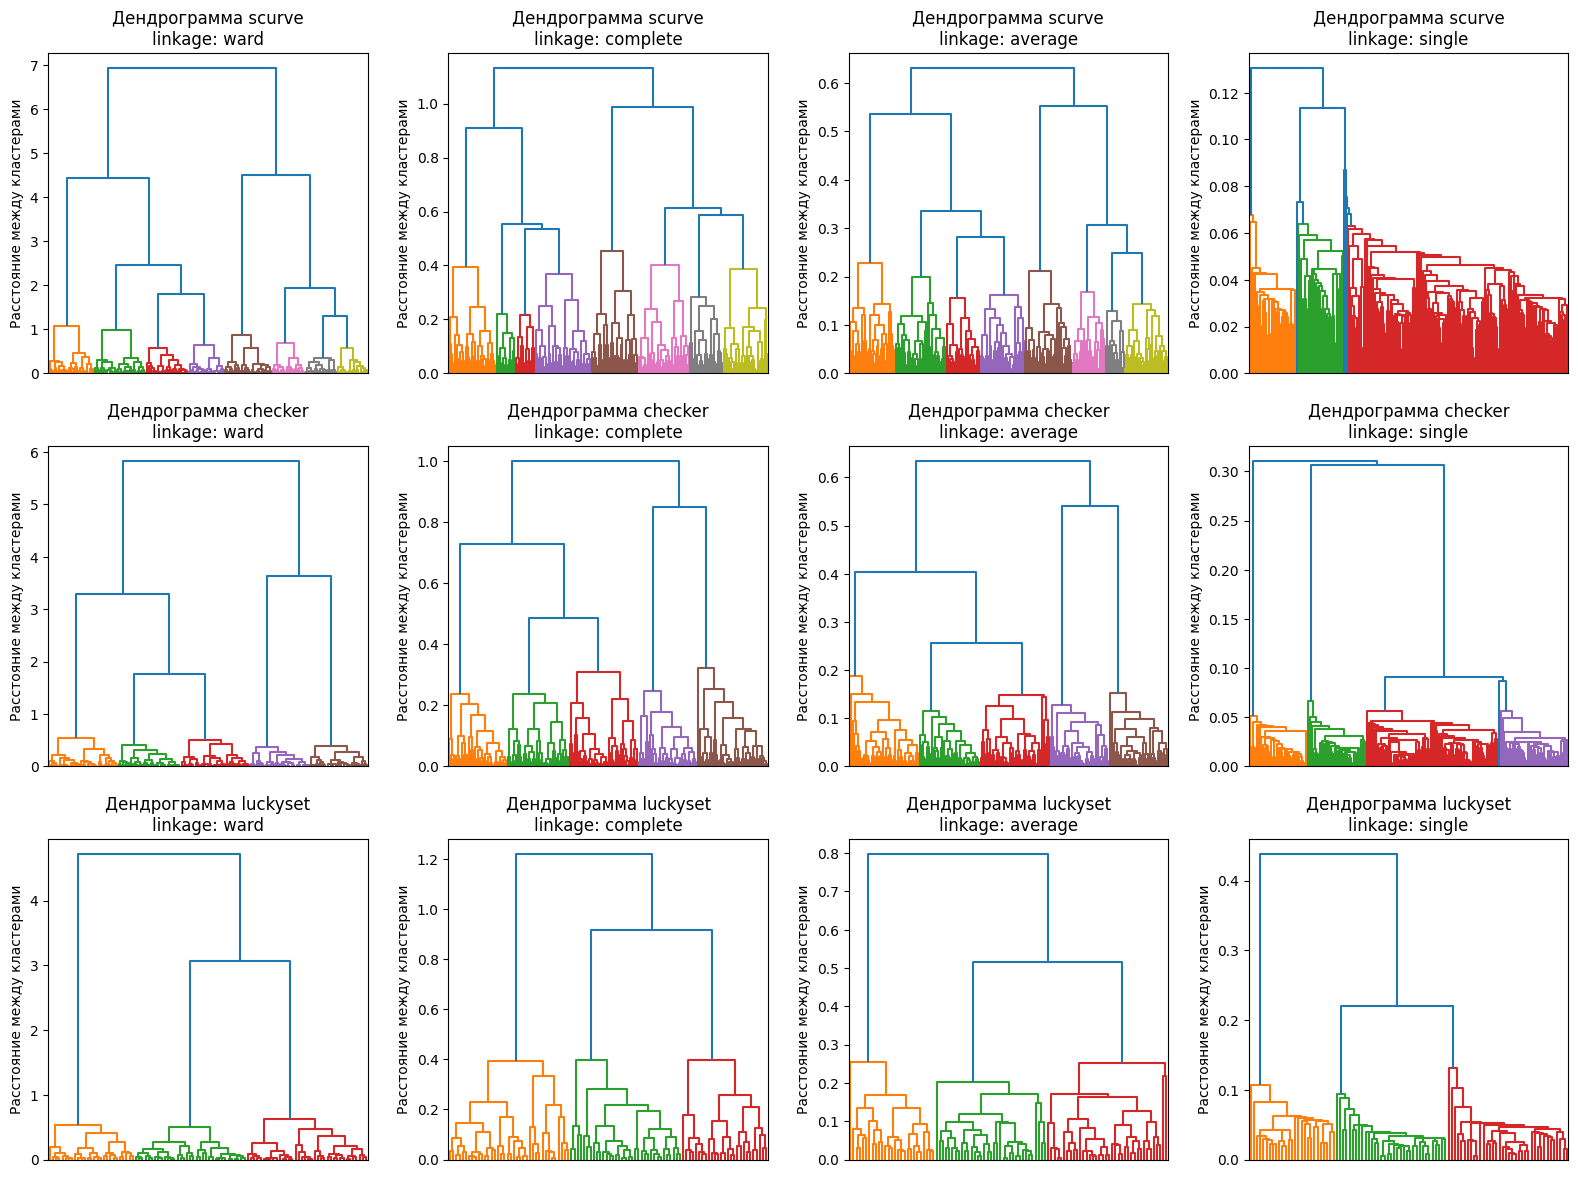

In [ ]:
datasets_labels_in_linkages = [scurve_labels_in_linkages,
                               checker_labels_in_linkages,
                               luckyset_labels_in_linkages]
Zs_in_linkages = [Z_scurve_in_linkages, Z_checker_in_linkages,
                  Z_luckyset_in_linkages]
ns_clusters = [8, 5, 3]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for i, dataset_labels_in_linkages in enumerate(datasets_labels_in_linkages):
    n = -ns_clusters[i] + 1
    for j, str_linkage in enumerate(linkages):
        dendrogram(Zs_in_linkages[i][str_linkage], ax=axes[i][j],
                   color_threshold=Zs_in_linkages[i][str_linkage][n, 2],
                   no_labels=True)
        axes[i][j].set_ylabel('Расстояние между кластерами')
        axes[i][j].set_title(f"Дендрограмма {titles[i]}\nlinkage: {str_linkage}")
    plt.tight_layout(pad=1.5)
plt.show()

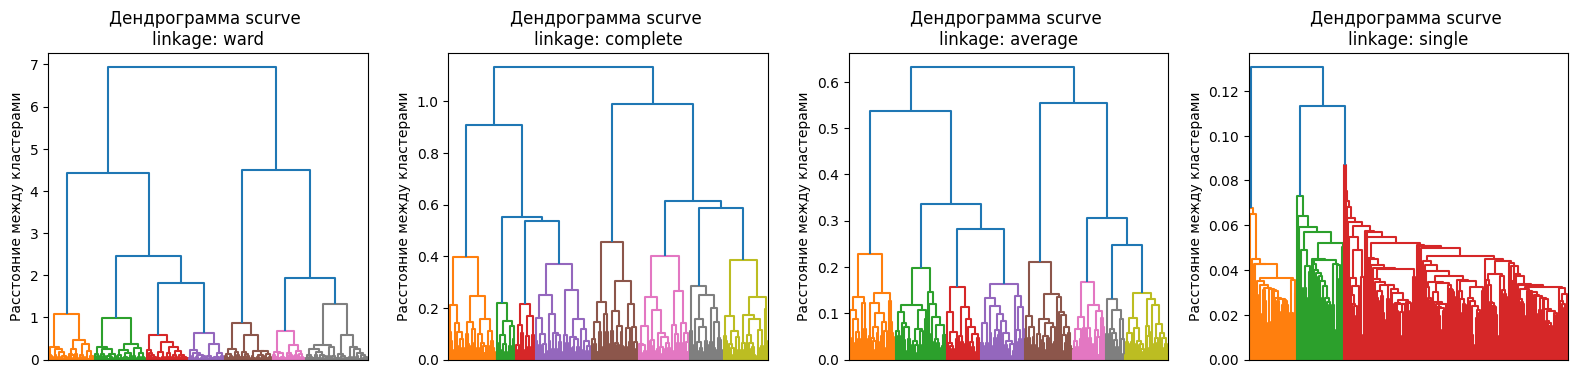

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
ns_clusters = [7, 8, 8, 3]
for i, n_clusters in enumerate(ns_clusters):
    n = -n_clusters + 1
    scurve_labels_in_linkages, Z_scurve_in_linkages = get_clustering_info(
        scurve_np, n_clusters)
    dendrogram(Z_scurve_in_linkages[linkages[i]], ax=axes[i],
                   color_threshold=Z_scurve_in_linkages[linkages[i]][n, 2],
                   no_labels=True)

    axes[i].set_ylabel('Расстояние между кластерами')
    axes[i].set_title(f"Дендрограмма scurve \nlinkage: {linkages[i]}")
plt.tight_layout(pad=1.5)
plt.show()

In [ ]:
def plot_hierachical_scatter(data, title, ns_clusters):
    data_clustered = []
    for i, n_cluster in enumerate(ns_clusters):
        labels_in_linkages, Z_in_linkages = get_clustering_info(
            data, n_cluster)
        clustered_df = pd.DataFrame(data=get_data_dict(data,
                                    labels_in_linkages[linkages[i]]))
        data_clustered.append(clustered_df)
    plot_scatter(data_clustered, [f'Кластеризация {title}\nlinkage: {linkage}'
                                for linkage in linkages])

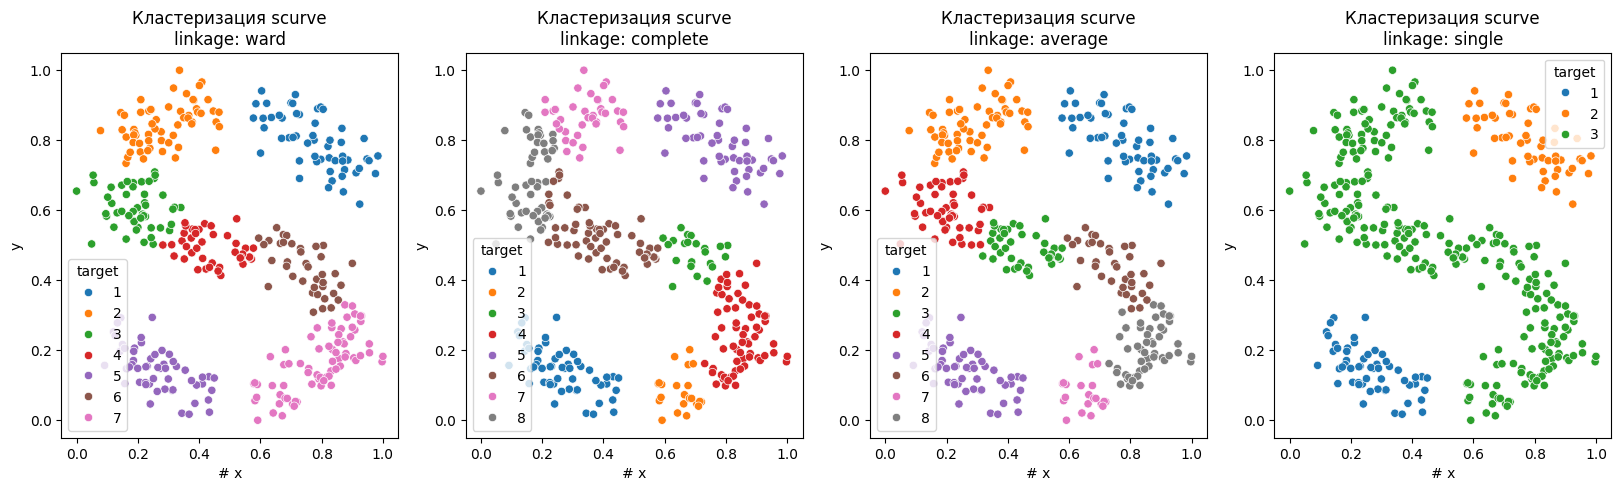

In [ ]:
plot_hierachical_scatter(scurve_np, 'scurve', [7, 8, 8, 3])

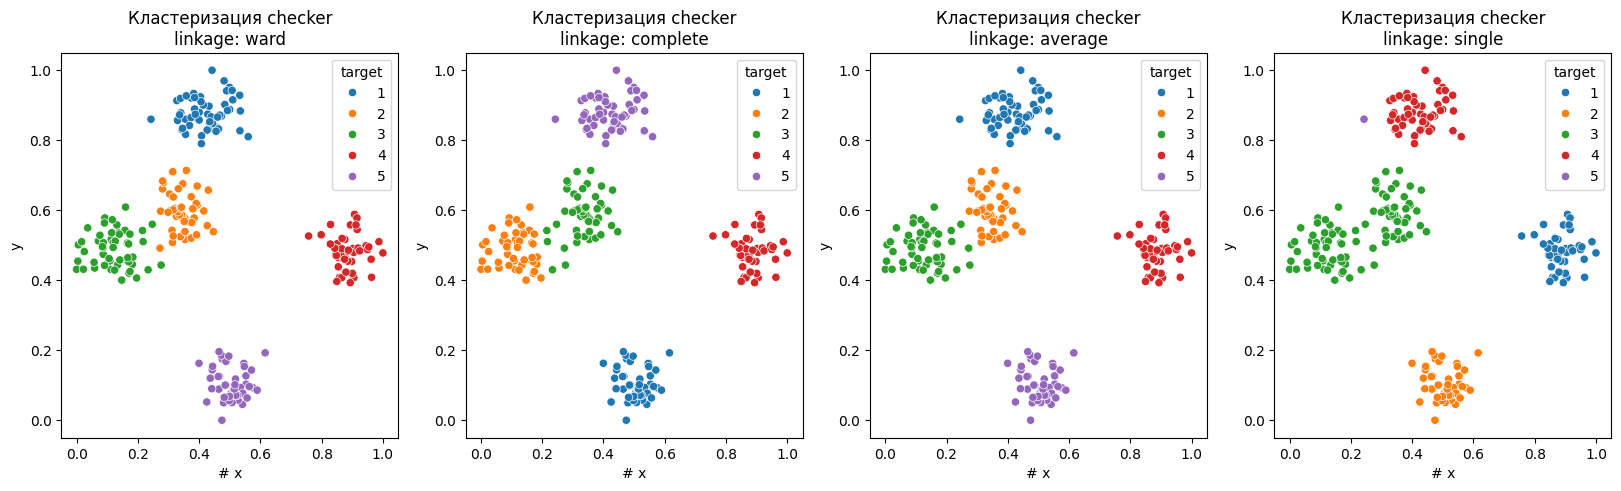

In [ ]:
plot_hierachical_scatter(checker_np, 'checker', [5, 5, 5, 5])

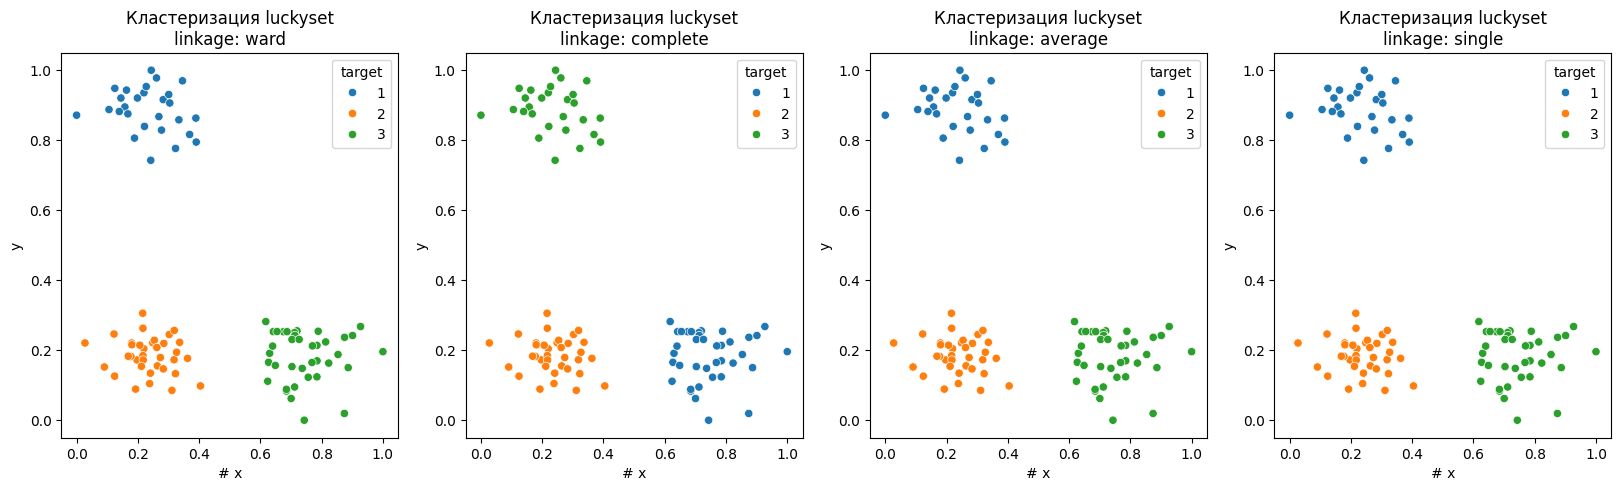

In [ ]:
plot_hierachical_scatter(luckyset_np, 'luckyset', [3, 3, 3, 3])

### 4.3. Сравните результаты кластеризации с результатами полученными в п.2 и п.3. Сделайте выводы о том, какой метод кластеризации подходит под каждый из наборов данных.


## 5. Изучение набора данных с большим количество признаков

### 5.1. Для набора данных отмеченного буквой вашего варианта, самостоятельно проведите кластеризацию. Метод выбираете самостоятельно, обосновав выбор. Предварительно рекомендуется провести исследование и предобработку набор данных.


In [ ]:
wineset = pd.read_csv('sample_data/lab2_winequality_red.csv')
wineset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Предобработка данных

In [ ]:
zmod = compute_zmod(wineset)
zmod_mask = np.abs(zmod < 3.5).all(axis=1)

In [ ]:
wineset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print("wineset:")
shapiro_test(wineset[zmod_mask])

wineset:
	column: fixed acidity
		pvalue: 1.1486494134407734e-20
	column: volatile acidity
		pvalue: 1.928100734627236e-10
	column: citric acid
		pvalue: 1.2901003678028955e-20
	column: residual sugar
		pvalue: 7.689758965495012e-15
	column: chlorides
		pvalue: 3.965136219363785e-09
	column: free sulfur dioxide
		pvalue: 5.2922903194240935e-25
	column: total sulfur dioxide
		pvalue: 4.512289385282043e-27
	column: density
		pvalue: 0.0002787098928820342
	column: pH
		pvalue: 0.011663364246487617
	column: sulphates
		pvalue: 3.9541800848656087e-16
	column: alcohol
		pvalue: 8.982553235055399e-24
	column: quality
		pvalue: 1.8449192818323794e-33


In [ ]:
def features_histplot(data, hue=None):
    palette = None
    if hue is not None:
        palette = 'tab10'
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
    for i in range(12):
        sns.histplot(data=data, x=data.columns[i],
                    kde=True, ax=axes[i//4][i%4], bins=100,
                     hue=hue, palette=palette)
    fig.suptitle('Распределения признаков', y=1.02, fontsize=20)
    plt.tight_layout(pad=1.5)
    plt.show()

In [ ]:
def features_boxplot(data, hue=None):
    palette = None
    if hue is not None:
        palette = 'tab10'
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
    for i in range(12):
        sns.boxplot(data=data, x=data.columns[i], ax=axes[i//4][i%4],
                    hue=hue, palette=palette)
    fig.suptitle('Распределения признаков на диаграмме boxplot',
                 y=1.02, fontsize=20)
    plt.tight_layout(pad=1.5)
    plt.show()

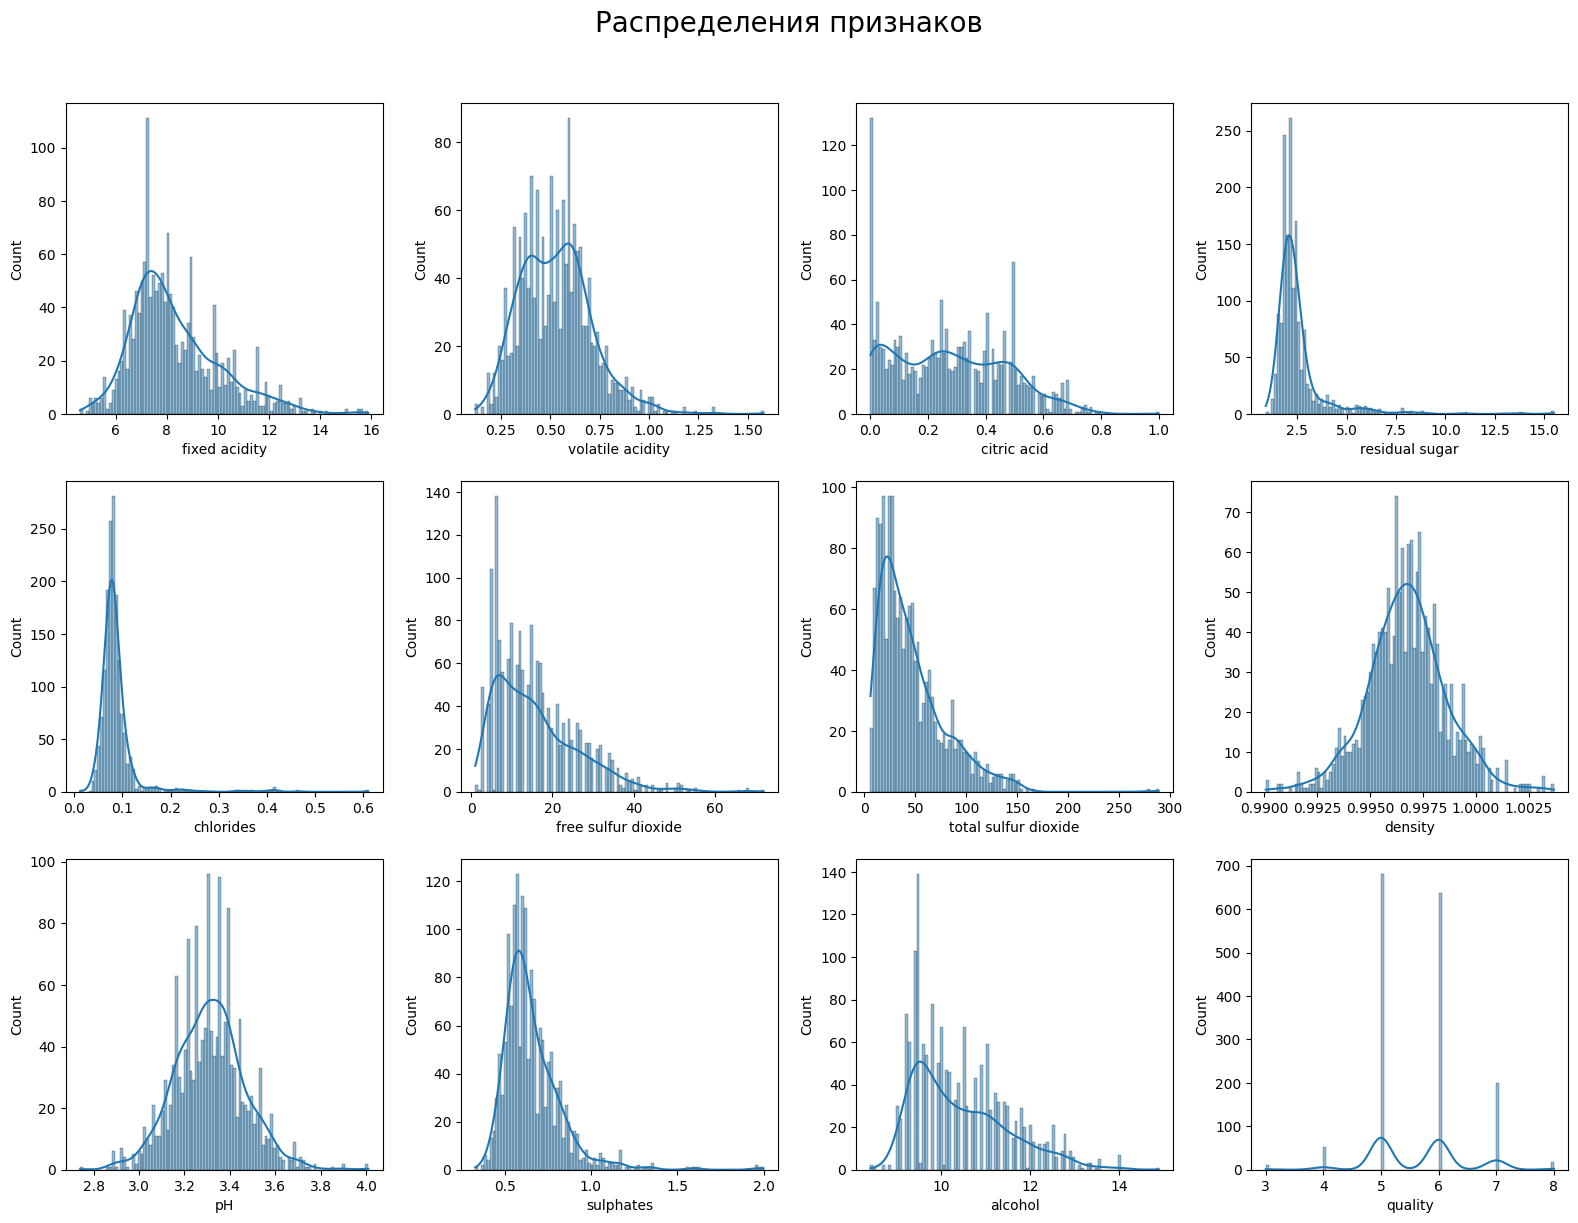

In [ ]:
features_histplot(wineset)

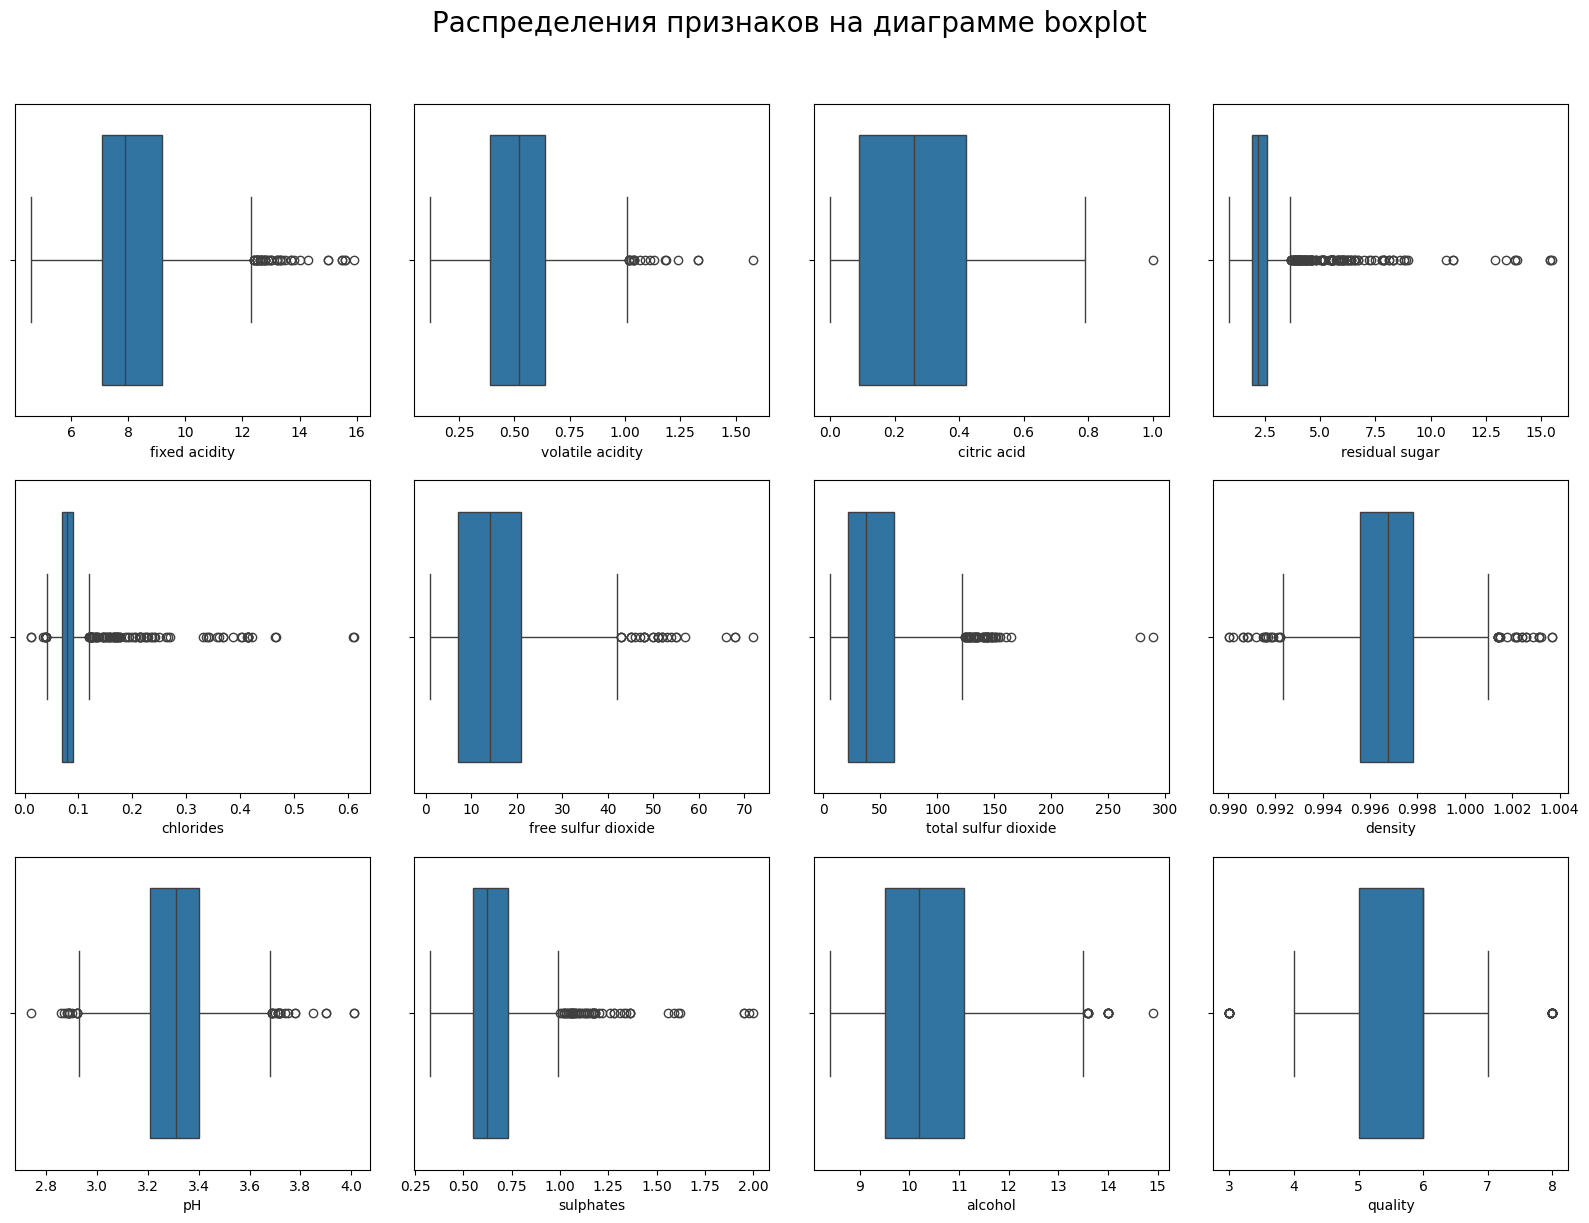

In [ ]:
features_boxplot(wineset)

In [ ]:
wineset_np = MinMaxScaler().fit_transform(wineset[zmod_mask])
wineset_preproc = pd.DataFrame(data=wineset_np.T, index=wineset.columns).T

In [ ]:
wineset_preproc.shape

(1297, 12)

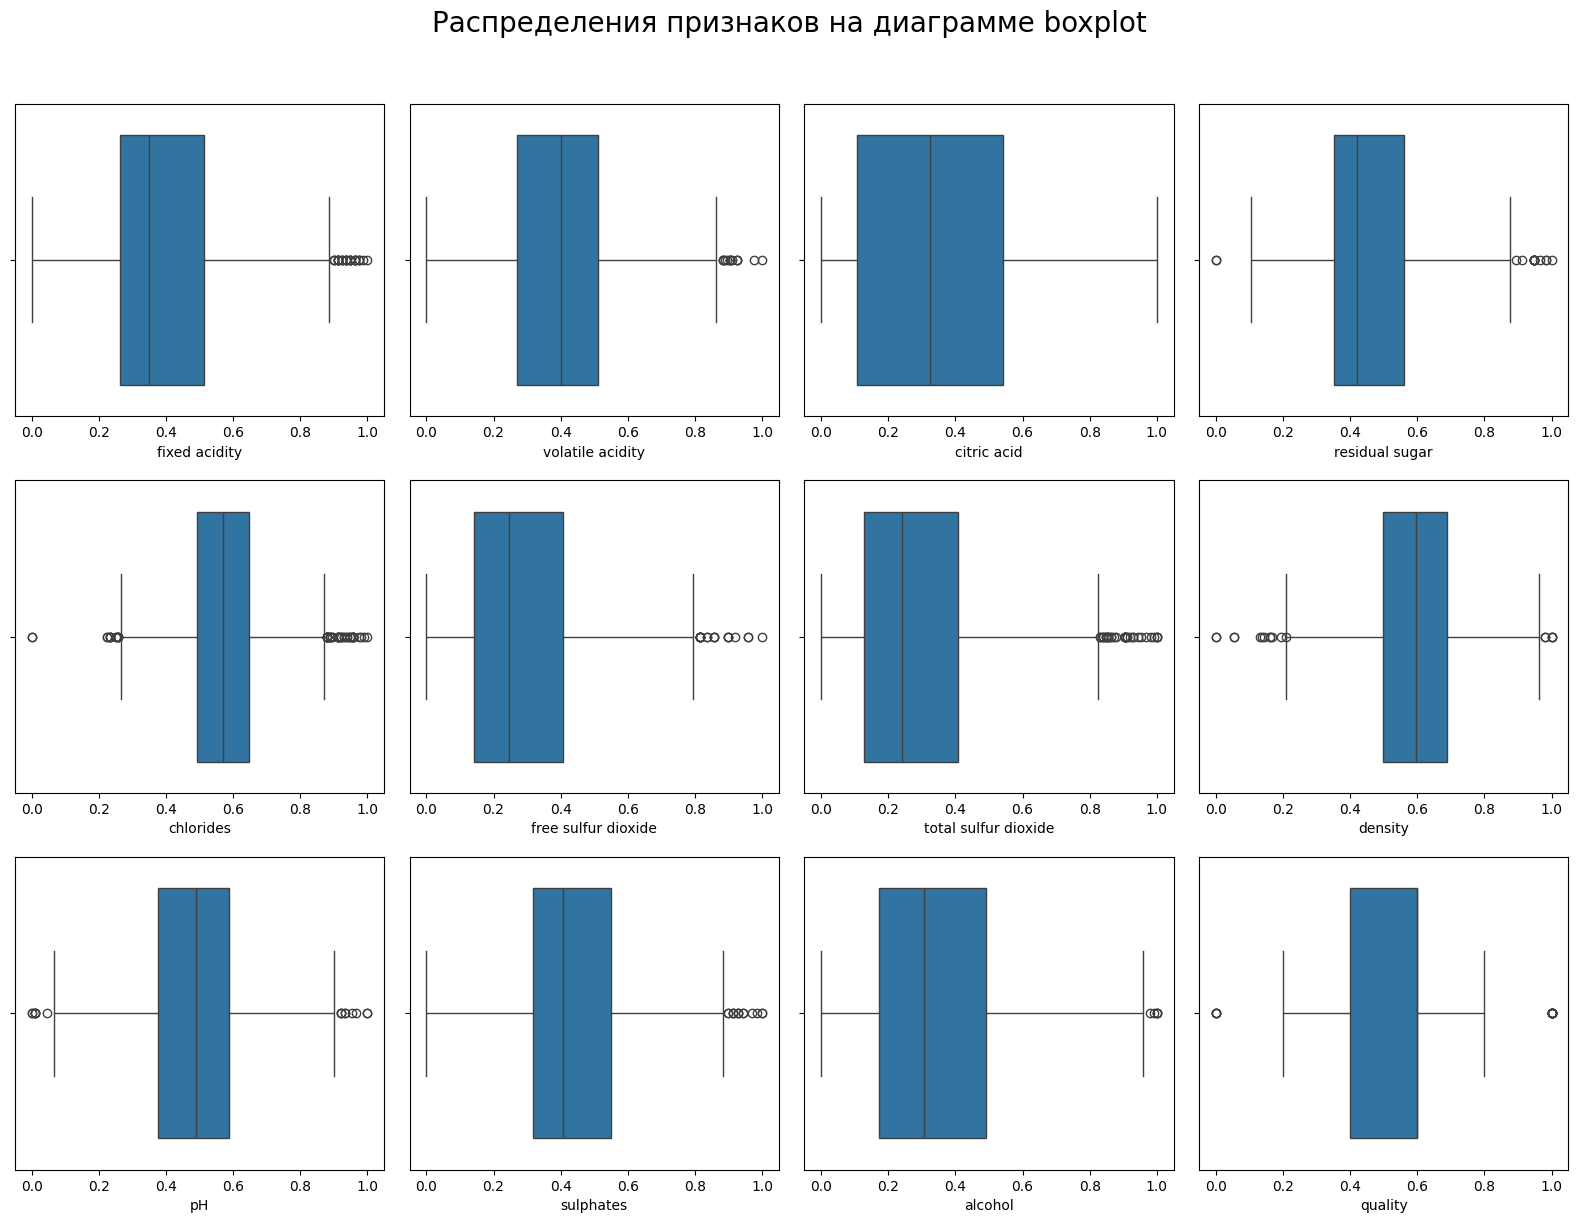

In [ ]:
features_boxplot(wineset_preproc)

In [ ]:
def pair_grid(dataset, target):
    g = sns.PairGrid(dataset, diag_sharey=False, hue=target, palette='tab10')
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot)
    color_labels = []
    for curr_color in g.palette:
        color_labels.append(plt.Circle((0, 0), 1, color=curr_color))
    g.add_legend({g.hue_names[i]: color_labels[i] for i in range(len(g.palette))})
    g.fig.suptitle("Scatter plots and KDE's", y=1.02)

In [ ]:
def average_n_features_to_sep(data):
    df = data.groupby('target').describe()
    columns = data.columns[:-1]
    counts = np.zeros(len(df))
    for column in columns:
        for i in range(len(df)):
            separated = True
            for j in range(len(df)):
                if i != j:
                    if not ((df[column].iloc[i]['25%'] > df[column].iloc[j]['75%']) \
                    or (df[column].iloc[i]['75%'] < df[column].iloc[j]['25%'])):
                        separated = False
            if separated:
                counts[i] += 1
    return counts.mean()

#### KMeans

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score


def get_kmeans_scores_dict(metric):
    rs = 42
    scores_dict = {}
    for i in tqdm(range(2, len(wineset_preproc) // 50)):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=rs)
        labels = kmeans.fit_predict(wineset_preproc)
        scores_dict = assign_score(wineset_preproc, labels, scores_dict,
                                   metric, kmeans)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
scores_dict = get_kmeans_scores_dict('ss')
print_scores_estimators(wineset_preproc, scores_dict, 'KMeans silhouette_score',
                        n_keys=3)

  0%|          | 0/23 [00:00<?, ?it/s]

KMeans silhouette_score:
	score = 0.21548017558133398:
		KMeans(n_clusters=2, n_init=10, random_state=42)
			number of clusters = 2
			power of cluster 0 = 486
			power of cluster 1 = 811
	score = 0.1920146493592023:
		KMeans(n_clusters=3, n_init=10, random_state=42)
			number of clusters = 3
			power of cluster 0 = 572
			power of cluster 1 = 324
			power of cluster 2 = 401
	score = 0.18557994253473986:
		KMeans(n_clusters=4, n_init=10, random_state=42)
			number of clusters = 4
			power of cluster 0 = 253
			power of cluster 1 = 451
			power of cluster 2 = 307
			power of cluster 3 = 286


In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(wineset_preproc)
wineset_preproc_clust = wineset_preproc.copy()
wineset_preproc_clust['target'] = labels
print(average_n_features_to_sep(wineset_preproc_clust))

3.0


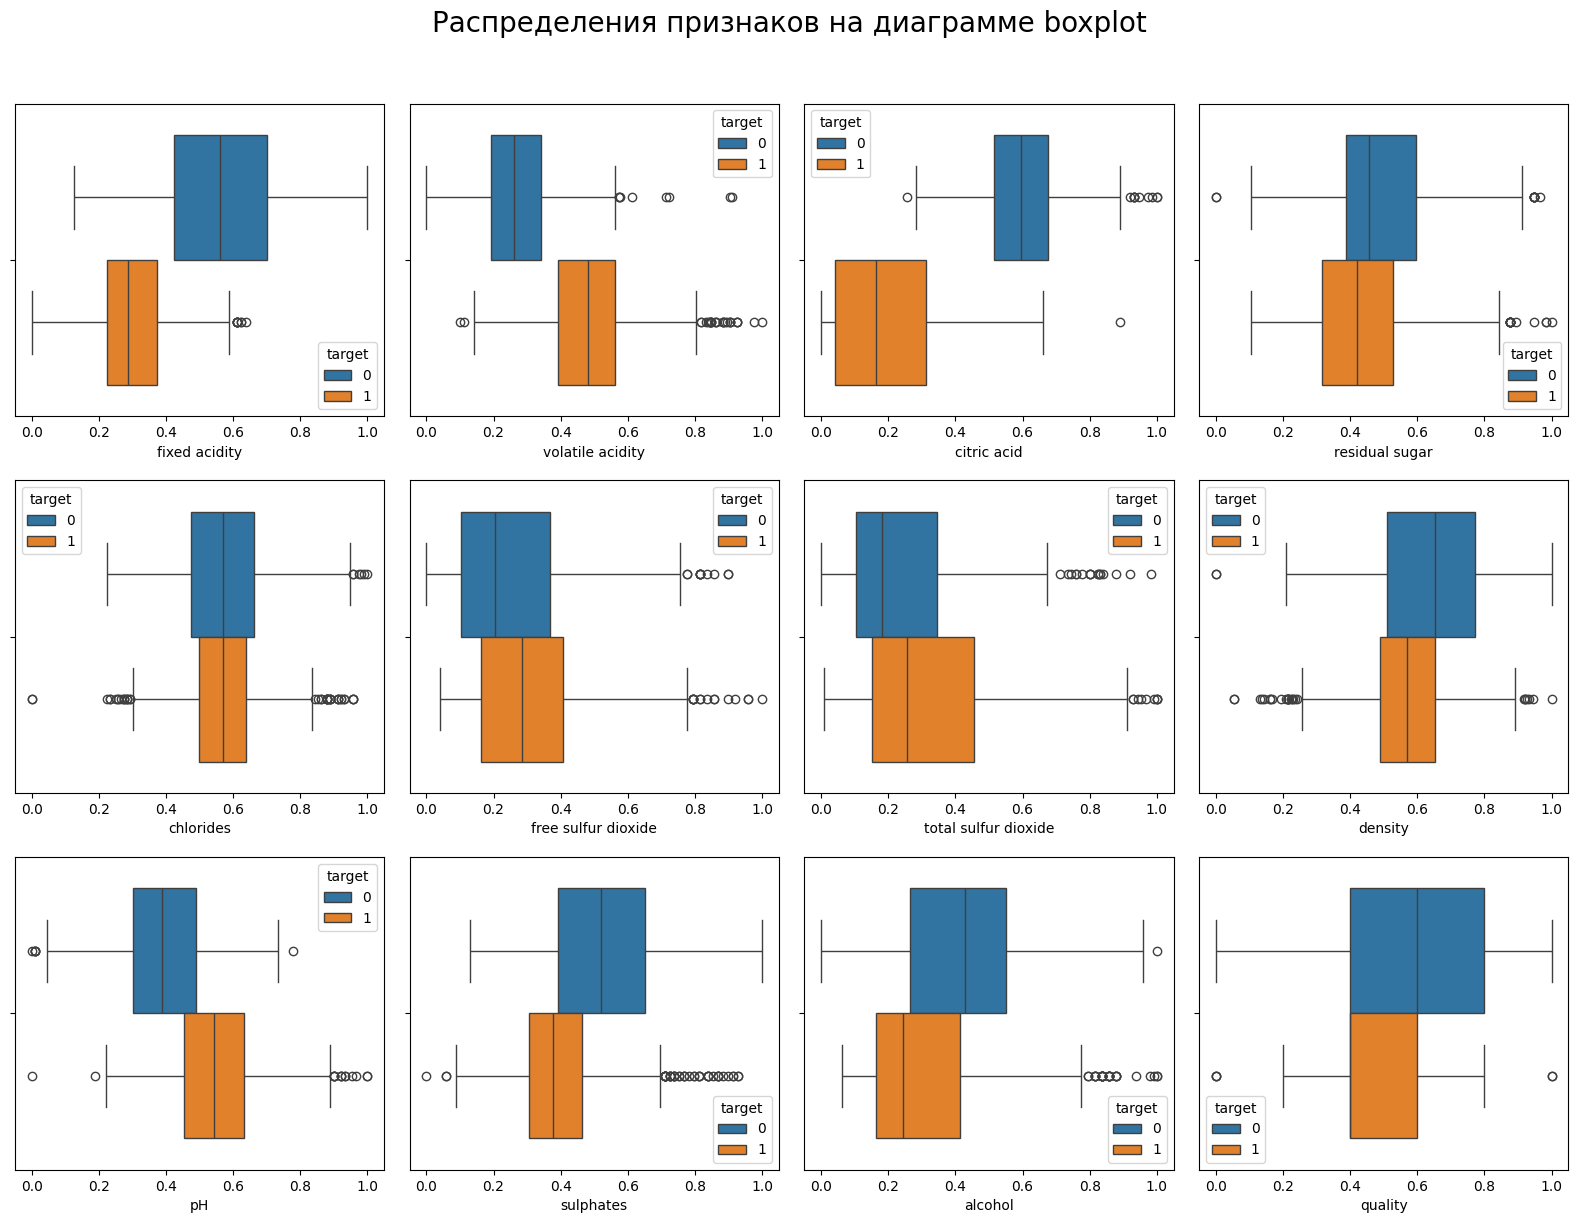

In [ ]:
features_boxplot(wineset_preproc_clust, hue='target')

In [ ]:
scores_dict = get_kmeans_scores_dict('dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'KMeans davies_bouldin_score', n_keys=3)

  0%|          | 0/23 [00:00<?, ?it/s]

KMeans davies_bouldin_score:
	score = 1.6097845181985404:
		KMeans(n_clusters=4, n_init=10, random_state=42)
			number of clusters = 4
			power of cluster 0 = 253
			power of cluster 1 = 451
			power of cluster 2 = 307
			power of cluster 3 = 286
	score = 1.71160391823377:
		KMeans(n_clusters=3, n_init=10, random_state=42)
			number of clusters = 3
			power of cluster 0 = 572
			power of cluster 1 = 324
			power of cluster 2 = 401
	score = 1.72061418266965:
		KMeans(n_clusters=5, n_init=10, random_state=42)
			number of clusters = 5
			power of cluster 0 = 399
			power of cluster 1 = 267
			power of cluster 2 = 211
			power of cluster 3 = 216
			power of cluster 4 = 204


In [ ]:
scores_dict = get_kmeans_scores_dict('chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'KMeans calinski_harabasz_score', n_keys=3)

  0%|          | 0/23 [00:00<?, ?it/s]

KMeans calinski_harabasz_score:
	score = 358.8843200867089:
		KMeans(n_clusters=2, n_init=10, random_state=42)
			number of clusters = 2
			power of cluster 0 = 486
			power of cluster 1 = 811
	score = 307.8472284520791:
		KMeans(n_clusters=3, n_init=10, random_state=42)
			number of clusters = 3
			power of cluster 0 = 572
			power of cluster 1 = 324
			power of cluster 2 = 401
	score = 279.2828425780287:
		KMeans(n_clusters=4, n_init=10, random_state=42)
			number of clusters = 4
			power of cluster 0 = 253
			power of cluster 1 = 451
			power of cluster 2 = 307
			power of cluster 3 = 286


#### AffinityPropagation

In [ ]:
from sklearn.cluster import AffinityPropagation


def get_affinity_propogation_scores_dict(metric):
    rs = 42
    scores_dict = {}
    dampings = np.arange(0.5, 1, 0.01)
    for damping in tqdm(dampings):
        ap = AffinityPropagation(damping=damping, random_state=rs)
        labels = ap.fit_predict(wineset_preproc)
        scores_dict = assign_score(wineset_preproc, labels, scores_dict,
                                   metric, ap)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
scores_dict = get_affinity_propogation_scores_dict('ss')
print_scores_estimators(wineset_preproc, scores_dict,
                        'AffinityPropagation silhouette_score',
                        n_keys=3)

  0%|          | 0/50 [00:00<?, ?it/s]

AffinityPropagation silhouette_score:
	score = 0.1264146517286689:
		AffinityPropagation(damping=0.5700000000000001, random_state=42)
			number of clusters = 78
			power of cluster 0 = 35
			power of cluster 1 = 18
			power of cluster 2 = 5
			power of cluster 3 = 9
			power of cluster 4 = 36
			power of cluster 5 = 10
			power of cluster 6 = 28
			power of cluster 7 = 17
			power of cluster 8 = 21
			power of cluster 9 = 14
			power of cluster 10 = 7
			power of cluster 11 = 24
			power of cluster 12 = 21
			power of cluster 13 = 5
			power of cluster 14 = 12
			power of cluster 15 = 19
			power of cluster 16 = 10
			power of cluster 17 = 27
			power of cluster 18 = 5
			power of cluster 19 = 9
			power of cluster 20 = 17
			power of cluster 21 = 12
			power of cluster 22 = 14
			power of cluster 23 = 7
			power of cluster 24 = 5
			power of cluster 25 = 6
			power of cluster 26 = 27
			power of cluster 27 = 4
			power of cluster 28 = 14
			power of cluster 29 = 24
			power of cluster

In [ ]:
ap = AffinityPropagation(damping=0.57, random_state=42)
labels = ap.fit_predict(wineset_preproc)
wineset_preproc_clust = wineset_preproc.copy()
wineset_preproc_clust['target'] = labels
print(average_n_features_to_sep(wineset_preproc_clust))

0.06493506493506493


In [ ]:
scores_dict = get_affinity_propogation_scores_dict('dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'AffinityPropagation davies_bouldin_score',
                        n_keys=3)

  0%|          | 0/50 [00:00<?, ?it/s]

AffinityPropagation davies_bouldin_score:
	score = 1.6398402922975828:
		AffinityPropagation(damping=0.53, random_state=42)
			number of clusters = 79
			power of cluster 0 = 35
			power of cluster 1 = 5
			power of cluster 2 = 9
			power of cluster 3 = 22
			power of cluster 4 = 38
			power of cluster 5 = 16
			power of cluster 6 = 20
			power of cluster 7 = 7
			power of cluster 8 = 23
			power of cluster 9 = 21
			power of cluster 10 = 21
			power of cluster 11 = 5
			power of cluster 12 = 15
			power of cluster 13 = 14
			power of cluster 14 = 10
			power of cluster 15 = 27
			power of cluster 16 = 10
			power of cluster 17 = 24
			power of cluster 18 = 17
			power of cluster 19 = 14
			power of cluster 20 = 6
			power of cluster 21 = 5
			power of cluster 22 = 19
			power of cluster 23 = 6
			power of cluster 24 = 25
			power of cluster 25 = 4
			power of cluster 26 = 26
			power of cluster 27 = 19
			power of cluster 28 = 24
			power of cluster 29 = 19
			power of cluster 30 = 17

In [ ]:
scores_dict = get_affinity_propogation_scores_dict('chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'AffinityPropagation calinski_harabasz_score',
                        n_keys=3)

  0%|          | 0/50 [00:00<?, ?it/s]

AffinityPropagation calinski_harabasz_score:
	score = 66.55094376897263:
		AffinityPropagation(damping=0.9900000000000004, random_state=42)
			number of clusters = 29
			power of cluster 0 = 31
			power of cluster 1 = 45
			power of cluster 2 = 35
			power of cluster 3 = 30
			power of cluster 4 = 35
			power of cluster 5 = 67
			power of cluster 6 = 106
			power of cluster 7 = 5
			power of cluster 8 = 35
			power of cluster 9 = 36
			power of cluster 10 = 29
			power of cluster 11 = 62
			power of cluster 12 = 47
			power of cluster 13 = 33
			power of cluster 14 = 48
			power of cluster 15 = 68
			power of cluster 16 = 89
			power of cluster 17 = 64
			power of cluster 18 = 44
			power of cluster 19 = 30
			power of cluster 20 = 26
			power of cluster 21 = 14
			power of cluster 22 = 29
			power of cluster 23 = 24
			power of cluster 24 = 97
			power of cluster 25 = 38
			power of cluster 26 = 41
			power of cluster 27 = 43
			power of cluster 28 = 46
	score = 52.60469261376386:
		A

#### MeanShift

In [ ]:
from sklearn.cluster import MeanShift


def get_mean_shift_scores_dict(metric):
    bandwidths = np.arange(0.1, 3.6, 0.1)
    scores_dict = {}
    for bandwidth in tqdm(bandwidths):
        ms = MeanShift(bandwidth=bandwidth)
        labels = ms.fit_predict(wineset_preproc)
        scores_dict = assign_score(wineset_preproc, labels, scores_dict,
                                   metric, ms)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
scores_dict = get_mean_shift_scores_dict('ss')
print_scores_estimators(wineset_preproc, scores_dict,
                        'MeanShift silhouette_score', n_keys=3)

  0%|          | 0/35 [00:00<?, ?it/s]

MeanShift silhouette_score:
	score = 0.34295648303257564:
		MeanShift(bandwidth=0.8)
			number of clusters = 2
			power of cluster 0 = 1291
			power of cluster 1 = 6
	score = 0.32286043639278955:
		MeanShift(bandwidth=0.2)
			number of clusters = 946
			power of cluster 0 = 10
			power of cluster 1 = 9
			power of cluster 2 = 10
			power of cluster 3 = 10
			power of cluster 4 = 6
			power of cluster 5 = 7
			power of cluster 6 = 6
			power of cluster 7 = 5
			power of cluster 8 = 6
			power of cluster 9 = 6
			power of cluster 10 = 6
			power of cluster 11 = 5
			power of cluster 12 = 5
			power of cluster 13 = 4
			power of cluster 14 = 4
			power of cluster 15 = 4
			power of cluster 16 = 4
			power of cluster 17 = 4
			power of cluster 18 = 4
			power of cluster 19 = 4
			power of cluster 20 = 4
			power of cluster 21 = 4
			power of cluster 22 = 3
			power of cluster 23 = 4
			power of cluster 24 = 4
			power of cluster 25 = 4
			power of cluster 26 = 4
			power of cluster 27 = 4


In [ ]:
ms = MeanShift(bandwidth=0.2)
labels = ms.fit_predict(wineset_preproc)
wineset_preproc_clust = wineset_preproc.copy()
wineset_preproc_clust['target'] = labels
print(average_n_features_to_sep(wineset_preproc_clust))

KeyboardInterrupt: 

In [ ]:
scores_dict = get_mean_shift_scores_dict('dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'MeanShift davies_bouldin_score', n_keys=4)

In [ ]:
scores_dict = get_mean_shift_scores_dict('chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'MeanShift calinski_harabasz_score', n_keys=4)

#### Hierachical

In [ ]:
Z_labels_in_linkages = {}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for str_linkage in linkages:
    Z_labels_in_linkages[str_linkage] = linkage(wineset_preproc, method=str_linkage)
for i, str_linkage in enumerate(linkages):
    dendrogram(Z_labels_in_linkages[str_linkage], ax=axes[i], no_labels=True,
               color_threshold=Z_labels_in_linkages[str_linkage][0, 2])

In [ ]:
def get_hierachical_scores_dict(str_linkage, metric):
    scores_dict = {}
    for i in range(2, len(wineset_preproc) // 50):
        Z = linkage(wineset_preproc, method=str_linkage)
        labels = fcluster(Z, i, criterion='maxclust')
        scores_dict = assign_score(wineset_preproc,
                                   labels, scores_dict, metric, i)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
scores_dict = get_hierachical_scores_dict('ward', 'ss')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy silhouette_score',
                        'ward', n_keys=3)

In [ ]:
Z = linkage(wineset_preproc, method='complete')
labels = fcluster(Z, 3, criterion='maxclust')
wineset_preproc_clust = wineset_preproc.copy()
wineset_preproc_clust['target'] = labels
print(average_n_features_to_sep(wineset_preproc_clust))

In [ ]:
features_boxplot(wineset_preproc_clust, hue='target')

In [ ]:
features_boxplot(wi)

In [ ]:
scores_dict = get_hierachical_scores_dict('ward', 'dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy davies_bouldin_score',
                        'ward', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('ward', 'chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy calinski_harabasz_score',
                        'ward', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('complete', 'ss')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy silhouette_score',
                        'complete', n_keys=3)

In [ ]:
scores_dict = get_hierachical_scores_dict('complete', 'dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy davies_bouldin_score',
                        'complete', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('complete', 'chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy calinski_harabasz_score',
                        'complete', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('average', 'ss')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy silhouette_score',
                        'average', n_keys=3)

In [ ]:
scores_dict = get_hierachical_scores_dict('average', 'dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy davies_bouldin_score',
                        'average', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('average', 'chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy calinski_harabasz_score',
                        'average', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('single', 'ss')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy silhouette_score',
                        'single', n_keys=3)

In [ ]:
scores_dict = get_hierachical_scores_dict('single', 'dbs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy davies_bouldin_score',
                        'single', n_keys=5)

In [ ]:
scores_dict = get_hierachical_scores_dict('single', 'chs')
print_scores_estimators(wineset_preproc, scores_dict,
                        'hiearachy calinski_harabasz_score',
                        'single', n_keys=5)

#### DBSCAN

In [ ]:
score_dict = get_dbscan_scores_dict(wineset_preproc, np.arange(0.1, 3.5, 0.1),
                                        np.arange(2, len(wineset_preproc) // 100),
                                        'ss')
print_scores_estimators(wineset_preproc, score_dict, 'dbscan', n_keys=3)

In [ ]:
score_dict = get_dbscan_scores_dict(wineset_preproc, np.arange(0.1, 3.5, 0.1),
                                        np.arange(2, len(wineset_preproc) // 100),
                                        'dbs')
print_scores_estimators(wineset_preproc, score_dict, 'dbscan')

In [ ]:
score_dict = get_dbscan_scores_dict(wineset_preproc, np.arange(0.1, 3.5, 0.1),
                                        np.arange(2, len(wineset_preproc) // 100),
                                        'chs')
print_scores_estimators(wineset_preproc, score_dict, 'dbscan')

#### HDBSCAN

In [ ]:
%pip install hdbscan

In [ ]:
#from sklearn.cluster import HDBSCAN
import hdbscan

def get_hdbscan_scores_dict(data, mins_samples, metric):
    scores_dict = {}
    for min_samples in mins_samples:
            h_dbscan = hdbscan.HDBSCAN(min_samples=min_samples)
            zmod = compute_zmod(data)
            zmod_mask = (np.abs(zmod) < 3.5).all(axis=1)
            n_outliers = len(data) - len(data[zmod_mask])
            labels = dbscan.fit_predict(data)
            if len(labels[labels == -1]) <= n_outliers:
                scores_dict = assign_score(data, labels,
                                           scores_dict, metric, h_dbscan)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
score_dict = get_hdbscan_scores_dict(wineset_preproc,
                                    np.arange(2, len(wineset_preproc) // 10),
                                    'ss')
print_scores_estimators(wineset_preproc, score_dict, 'hdbscan')

#### OPTICS

In [ ]:
from sklearn.cluster import OPTICS


def get_optics_scores_dict(data, eps_s, mins_samples, metric):
    max_score = -1
    scores_dict = {}
    for eps in tqdm(eps_s):
        for min_samples in mins_samples:
            optics = OPTICS(max_eps=eps, min_samples=min_samples)
            zmod = compute_zmod(data)
            zmod_mask = (np.abs(zmod) < 3.5).all(axis=1)
            n_outliers = len(data) - len(data[zmod_mask])
            labels = optics.fit_predict(data)
            if len(labels[labels == -1]) <= n_outliers:
                scores_dict = assign_score(data, labels,
                                           scores_dict, metric, optics)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

In [ ]:
score_dict = get_optics_scores_dict(wineset_preproc,
                                    np.arange(0.1, 3.6, 0.01),
                                    np.arange(2, len(wineset_preproc) // 100),
                                    'ss')
print_scores_estimators(wineset_preproc, score_dict, 'optics')

#### SpectralClustering

In [ ]:
from sklearn.cluster import SpectralClustering


def get_spectral_scores_dict(metric):
    rs = 42
    scores_dict = {}
    for i in tqdm(range(2, len(wineset_preproc) // 50)):
        sc = SpectralClustering(n_clusters=i, random_state=rs)
        labels = sc.fit_predict(wineset_preproc)
        scores_dict = assign_score(wineset_preproc, labels, scores_dict,
                                   metric, sc)
    scores_dict = get_sorted_scores_dict(scores_dict, metric)
    return scores_dict

0.21548017558133398

In [ ]:
score_dict = get_spectral_scores_dict('ss')
print_scores_estimators(wineset_preproc, score_dict, 'spectral clustering',
                        n_keys=3)

In [ ]:
sc = SpectralClustering(n_clusters=2, random_state=42)
labels = sc.fit_predict(wineset_preproc)
wineset_preproc_clust = wineset_preproc.copy()
wineset_preproc_clust['target'] = labels
print(average_n_features_to_sep(wineset_preproc_clust))

In [ ]:
print("cluster 1:")
shapiro_test(wineset_preproc_clust[wineset_preproc_clust['target'] == 0])
print("cluster 2:")
shapiro_test(wineset_preproc_clust[wineset_preproc_clust['target'] == 1])

In [ ]:
features_boxplot(wineset_preproc_clust, hue='target')

#### Визуализация

In [ ]:
features_boxplot(wineset_preproc_cp, 'target')

In [ ]:
features_histplot(wineset_preproc_cp, 'target')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
wineset_pca = pca.fit_transform(
    StandardScaler().fit_transform(wineset[zmod_mask]))
wineset_clustered = pd.DataFrame(data=wineset_pca,
                                 columns=['First axis', 'Second axis'])
wineset_clustered['target'] = labels

In [ ]:
sns.scatterplot(data=wineset_clustered, hue='target',
                x=wineset_clustered.columns[0],
                y=wineset_clustered.columns[1],
                palette='tab10').set(title='PCA')

In [ ]:
pair_grid(wineset_preproc_clust, 'target')